In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [10]:
df.drop(["Make","Model", "Vehicle Class", "Cylinders", "Transmission", "Fuel Type","Fuel Consumption Comb (mpg)"],\
        inplace = True, axis = 1)
df

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244
...,...,...,...,...,...
7380,2.0,10.7,7.7,9.4,219
7381,2.0,11.2,8.3,9.9,232
7382,2.0,11.7,8.6,10.3,240
7383,2.0,11.2,8.3,9.9,232


In [27]:
df.rename(columns={'Engine Size(L)': 'Engine_Size', 'Fuel Consumption City (L/100 km)': 'FC_City' \
                  ,'Fuel Consumption Hwy (L/100 km)': 'FC_Hwy', 'Fuel Consumption Comb (L/100 km)': 'FC_Comb'\
                  ,'CO2 Emissions(g/km)': 'CO2_Ems'}, inplace=True)
df.sample(1)

,Engine_Size,FC_City,FC_Hwy,FC_Comb,CO2_Ems
7256,4.0,15.6,12.4,14.1,329


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Engine_Size(L)  7385 non-null   float64
 1   FC_City         7385 non-null   float64
 2   FC_Hwy          7385 non-null   float64
 3   FC_Comb         7385 non-null   float64
 4   CO2_Ems         7385 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 288.6 KB


In [28]:
df.isnull().sum()

Engine_Size    0
FC_City        0
FC_Hwy         0
FC_Comb        0
CO2_Ems        0
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_Size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
FC_City,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
FC_Hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
FC_Comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
CO2_Ems,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [30]:
df.corr()

,Engine_Size,FC_City,FC_Hwy,FC_Comb,CO2_Ems
Engine_Size,1.000000,0.831379,0.761526,0.817060,0.851145
FC_City,0.831379,1.000000,0.948180,0.993810,0.919592
FC_Hwy,0.761526,0.948180,1.000000,0.977299,0.883536
FC_Comb,0.817060,0.993810,0.977299,1.000000,0.918052
CO2_Ems,0.851145,0.919592,0.883536,0.918052,1.000000


In [33]:
for i in df.drop(columns = "CO2_Ems"):
    print(f"corr between CO2_Ems and {i:<12}: {df.CO2_Ems.corr(df[i])}")

corr between CO2_Ems and Engine_Size : 0.8511446437900009
corr between CO2_Ems and FC_City     : 0.9195924749024849
corr between CO2_Ems and FC_Hwy      : 0.8835359454649435
corr between CO2_Ems and FC_Comb     : 0.9180515723870849


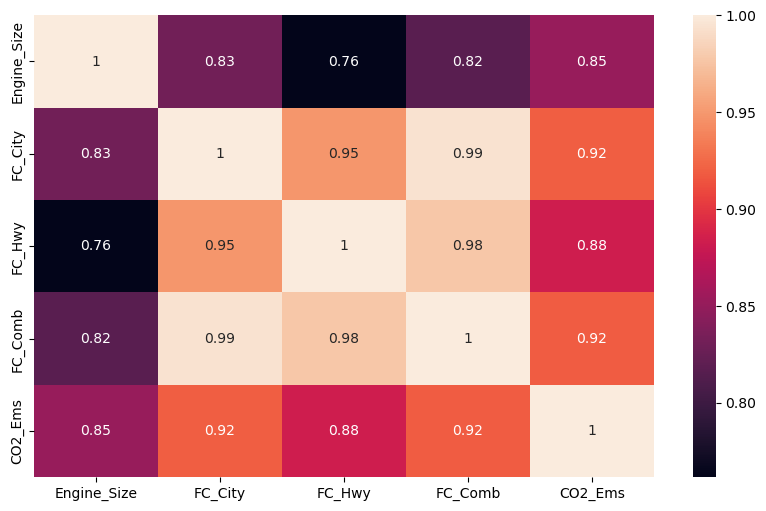

In [32]:
sns.heatmap(df.corr(), annot=True);

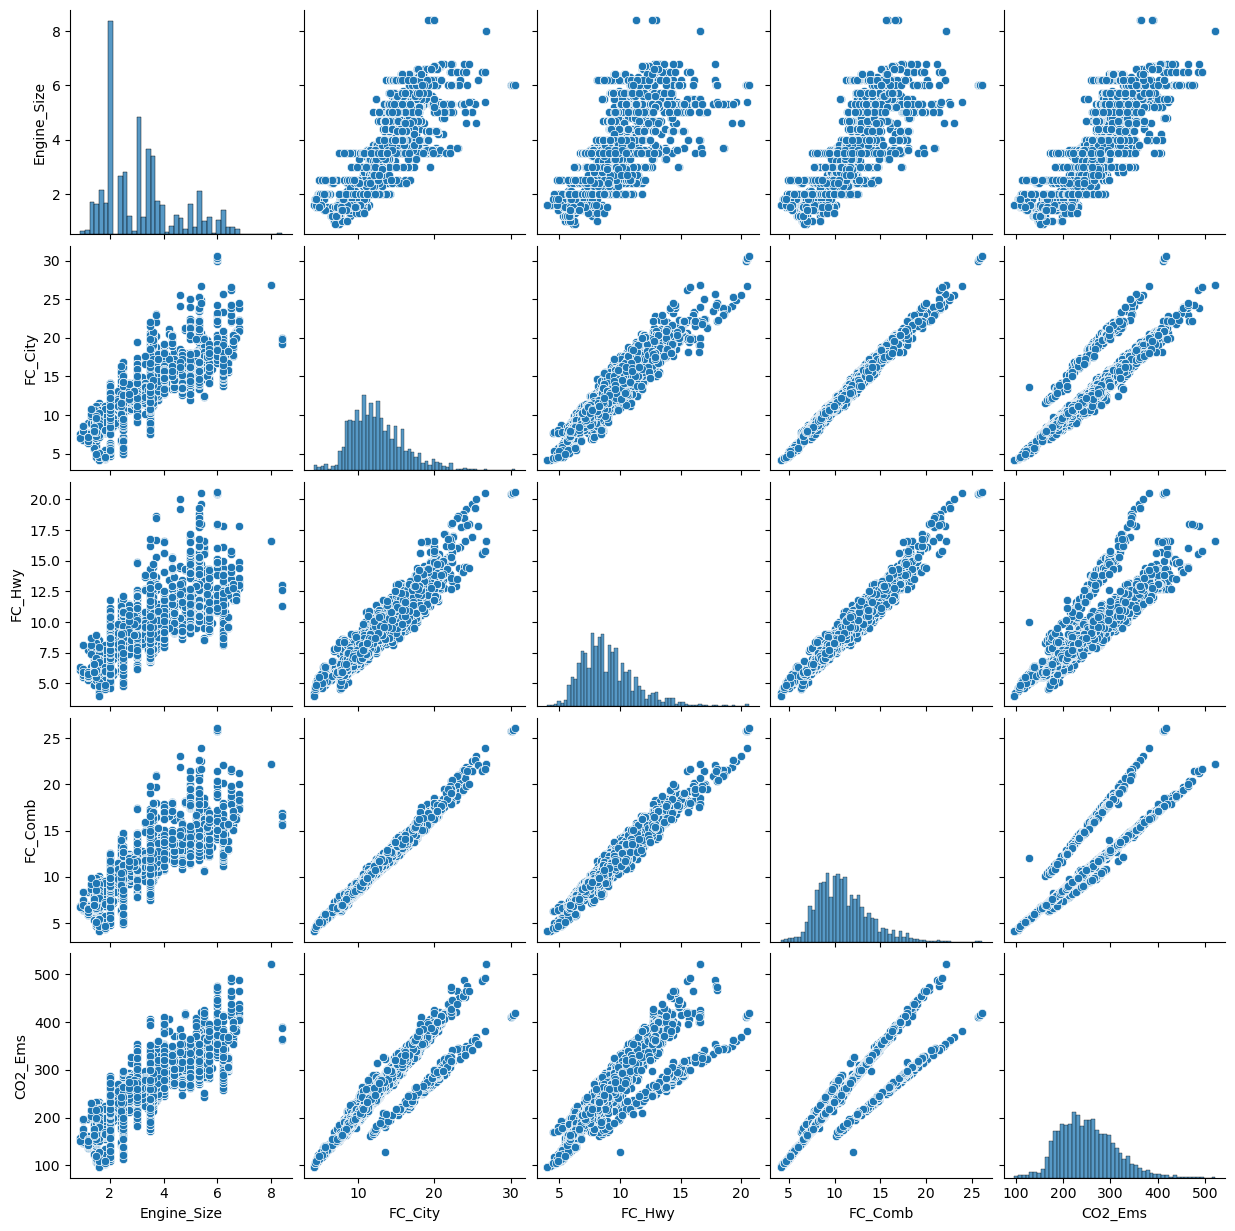

In [34]:
sns.pairplot(df);

# Simple Linear Regression (SLR)

In [43]:
df = df[["Engine_Size", "CO2_Ems"]]
df.tail(3)

,Engine_Size,CO2_Ems
7382,2.0,240
7383,2.0,232
7384,2.0,248


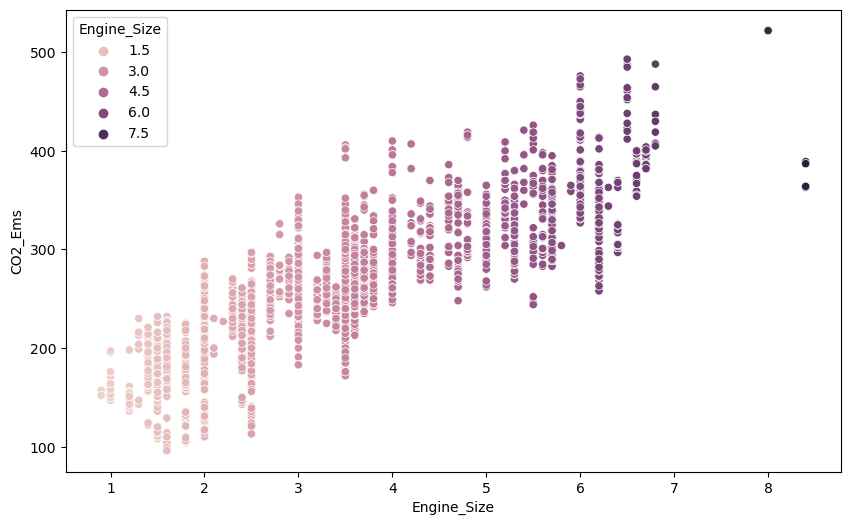

In [44]:
sns.scatterplot(x="Engine_Size", y="CO2_Ems", data=df, hue="Engine_Size");

In [50]:
corr = df.CO2_Ems.corr(df.Engine_Size)
print("corr     =", corr)
R2_score =corr**2
print("R2_score =", R2_score)

corr     = 0.8511446437900009
R2_score = 0.7244472046524075


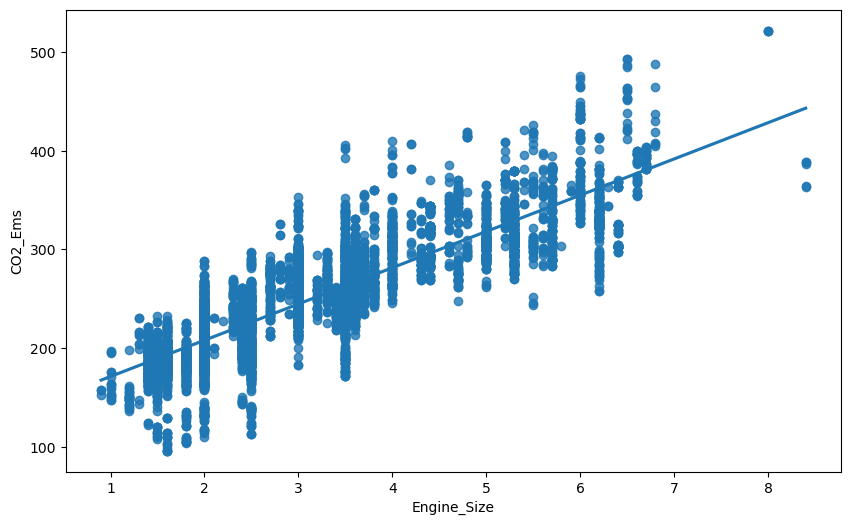

In [51]:
sns.regplot(x="Engine_Size", y ="CO2_Ems", data=df, ci=None);

In [52]:
X = df["Engine_Size"]
y = df["CO2_Ems"]

In [53]:
b1, b0 = np.polyfit(X, y, deg = 1)

In [54]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 36.77731518641955
b0 : 134.365892723495


In [55]:
y_pred = b1*X + b0
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine_Size, Length: 7385, dtype: float64

In [56]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_Size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
CO2_Ems,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


# TEST

In [60]:
potential_CO2 = np.linspace(0,10,101)   # potansiyel harcama
potential_CO2

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [61]:
predicted_CO2_lin = b1*potential_CO2 + b0
predicted_CO2_lin

array([134.36589272, 138.04362424, 141.72135576, 145.39908728,
       149.0768188 , 152.75455032, 156.43228184, 160.11001335,
       163.78774487, 167.46547639, 171.14320791, 174.82093943,
       178.49867095, 182.17640247, 185.85413398, 189.5318655 ,
       193.20959702, 196.88732854, 200.56506006, 204.24279158,
       207.9205231 , 211.59825461, 215.27598613, 218.95371765,
       222.63144917, 226.30918069, 229.98691221, 233.66464373,
       237.34237525, 241.02010676, 244.69783828, 248.3755698 ,
       252.05330132, 255.73103284, 259.40876436, 263.08649588,
       266.76422739, 270.44195891, 274.11969043, 277.79742195,
       281.47515347, 285.15288499, 288.83061651, 292.50834803,
       296.18607954, 299.86381106, 303.54154258, 307.2192741 ,
       310.89700562, 314.57473714, 318.25246866, 321.93020017,
       325.60793169, 329.28566321, 332.96339473, 336.64112625,
       340.31885777, 343.99658929, 347.6743208 , 351.35205232,
       355.02978384, 358.70751536, 362.38524688, 366.06

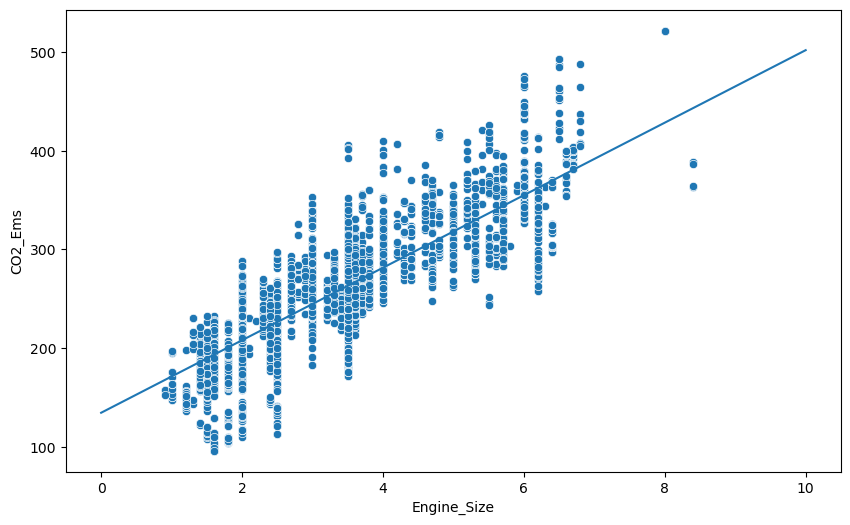

In [62]:
plt.plot(potential_CO2, predicted_CO2_lin)
sns.scatterplot(x="Engine_Size", y = "CO2_Ems", data=df);

In [63]:
a = np.polyfit(X, y, deg=4)
a

array([ 5.39912625e-02, -3.64928552e-01, -3.27697586e+00,  6.30902240e+01,
        9.53332074e+01])

In [64]:
a1= a[0]
a2= a[1]
a3= a[2]
a4= a[3]
a0= a[4]

In [65]:
predicted_CO2_poly = a1 * potential_CO2**4 + a2 * potential_CO2**3 + a3 * potential_CO2**2 + a4 * potential_CO2 + a0
predicted_CO2_poly

array([ 95.33320742, 101.60910053, 107.81734014, 113.95593105,
       120.02300763, 126.01683384, 131.93580321, 137.77843885,
       143.54339347, 149.22944932, 154.83551826, 160.36064173,
       165.80399072, 171.16486582, 176.44269721, 181.63704463,
       186.74759739, 191.77417442, 196.71672418, 201.57532474,
       206.35018375, 211.04163841, 215.65015553, 220.17633149,
       224.62089225, 228.98469334, 233.26871987, 237.47408654,
       241.60203762, 245.65394697, 249.63131801, 253.53578375,
       257.36910679, 261.1331793 , 264.83002301, 268.46178926,
       272.03075895, 275.53934256, 278.99008017, 282.3856414 ,
       285.72882549, 289.02256123, 292.269907  , 295.47405076,
       298.63831005, 301.76613198, 304.86109325, 307.92690014,
       310.9673885 , 313.98652376, 316.98840092, 319.9772446 ,
       322.95740894, 325.93337771, 328.90976422, 331.89131139,
       334.88289171, 337.88950723, 340.9162896 , 343.96850004,
       347.05152936, 350.17089794, 353.33225573, 356.54

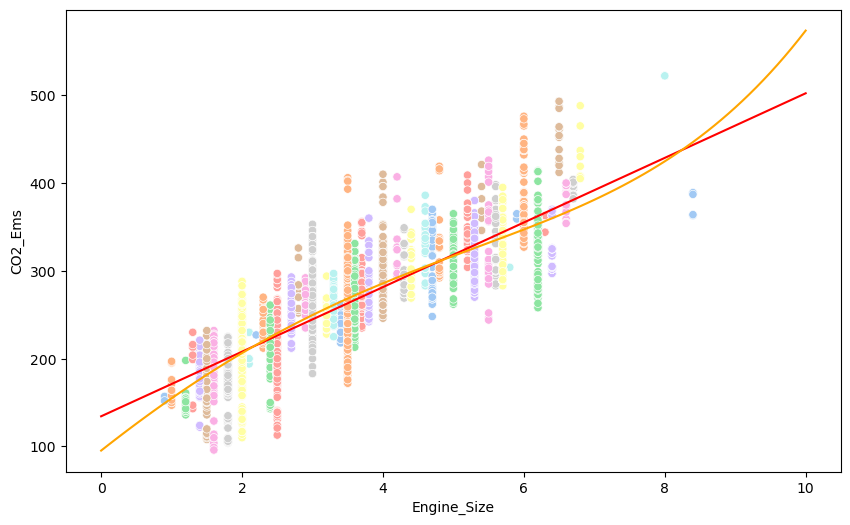

In [71]:
plt.plot(potential_CO2, predicted_CO2_lin, color="red")
plt.plot(potential_CO2, predicted_CO2_poly, color="orange")
sns.scatterplot(x="Engine_Size", y = "CO2_Ems", data=df, hue="Engine_Size", palette="pastel", legend= False);

# Execution

In [75]:
pred_lin = b1 * X + b0
pred_poly = a1 * X**4 + a2 * X**3 + a3 * X**2 + a4 * X + a0
pred_poly

0       206.350184
1       224.620892
2       181.637045
3       268.461789
4       268.461789
           ...    
7380    206.350184
7381    206.350184
7382    206.350184
7383    206.350184
7384    206.350184
Name: Engine_Size, Length: 7385, dtype: float64

### POLY PREDICTON

In [80]:
values = {"actual": y, "predicted":pred_poly, "resudial": y - pred_poly, "LSE" : (y - pred_poly)**2}
df_pol = pd.DataFrame(values)
df_pol

,actual,predicted,resudial,LSE
0,196,206.350184,-10.350184,107.126304
1,221,224.620892,-3.620892,13.110861
2,136,181.637045,-45.637045,2082.739842
3,255,268.461789,-13.461789,181.219770
4,244,268.461789,-24.461789,598.379134
...,...,...,...,...
7380,219,206.350184,12.649816,160.017851
7381,232,206.350184,25.649816,657.913074
7382,240,206.350184,33.649816,1132.310134
7383,232,206.350184,25.649816,657.913074


In [81]:
df_pol.LSE.sum() 

6787658.079559195

### LIN PREDICTION

In [82]:
values = {"actual": y, "predicted":pred_lin, "resudial": y - pred_lin, "LSE" : (y - pred_lin)**2}
df_lin = pd.DataFrame(values)
df_lin

,actual,predicted,resudial,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


In [84]:
df_lin.LSE.sum() 

6966208.685372685

**RESULT :** Poly is slightly better than lin